In [2]:
from google.colab import files
uploaded = files.upload()


Saving News-_dataset.zip to News-_dataset.zip


In [3]:
import zipfile
import os

with zipfile.ZipFile("News-_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("news_data")

os.listdir("news_data")

['Fake.csv', 'True.csv']

In [9]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns

true_df = pd.read_csv("news_data/True.csv")
fake_df = pd.read_csv("news_data/Fake.csv")

# Assign labels
true_df['label'] = 1  # Real News
fake_df['label'] = 0  # Fake News

# Basic Structure and Data Types


In [6]:
# True News
print("🔹 True News Shape:", true_df.shape)
print("🔹 True News Columns:", true_df.columns.tolist())
print("🔹 True News Types:\n", true_df.dtypes)

# Fake News
print("🔹 Fake News Shape:", fake_df.shape)
print("🔹 Fake News Columns:", fake_df.columns.tolist())
print("🔹 Fake News Types:\n", fake_df.dtypes)


🔹 True News Shape: (21417, 5)
🔹 True News Columns: ['title', 'text', 'subject', 'date', 'label']
🔹 True News Types:
 title      object
text       object
subject    object
date       object
label       int64
dtype: object
🔹 Fake News Shape: (23481, 5)
🔹 Fake News Columns: ['title', 'text', 'subject', 'date', 'label']
🔹 Fake News Types:
 title      object
text       object
subject    object
date       object
label       int64
dtype: object


# Missing Values

In [7]:
# True News
missing_true = true_df.isnull().sum()
missing_true_percent = (missing_true / len(true_df)) * 100
print("🔹 True News Missing Values:\n", pd.DataFrame({'Missing': missing_true, 'Percent': missing_true_percent}))

# Fake News
missing_fake = fake_df.isnull().sum()
missing_fake_percent = (missing_fake / len(fake_df)) * 100
print("🔹 Fake News Missing Values:\n", pd.DataFrame({'Missing': missing_fake, 'Percent': missing_fake_percent}))


🔹 True News Missing Values:
          Missing  Percent
title          0      0.0
text           0      0.0
subject        0      0.0
date           0      0.0
label          0      0.0
🔹 Fake News Missing Values:
          Missing  Percent
title          0      0.0
text           0      0.0
subject        0      0.0
date           0      0.0
label          0      0.0


# Subject Distribution

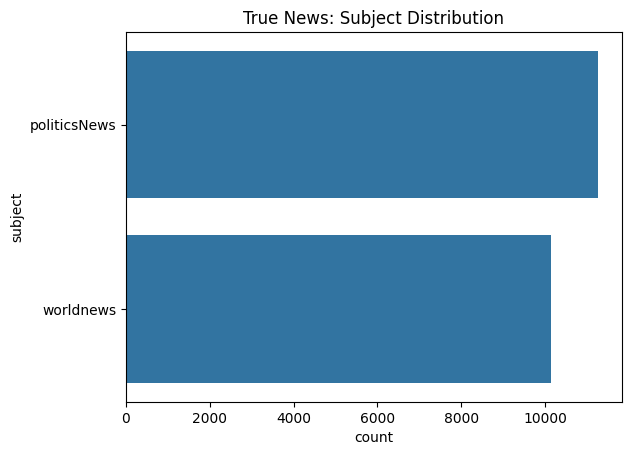

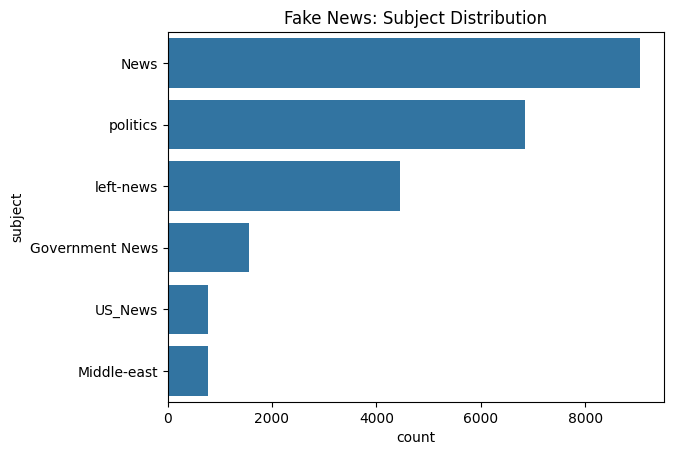

In [10]:
# True News
if 'subject' in true_df.columns:
    sns.countplot(data=true_df, y='subject', order=true_df['subject'].value_counts().index)
    plt.title("True News: Subject Distribution")
    plt.show()

# Fake News
if 'subject' in fake_df.columns:
    sns.countplot(data=fake_df, y='subject', order=fake_df['subject'].value_counts().index)
    plt.title("Fake News: Subject Distribution")
    plt.show()


# Articles Published Per Year

In [11]:
true_df['date'] = pd.to_datetime(true_df['date'], errors='coerce')
fake_df['date'] = pd.to_datetime(fake_df['date'], errors='coerce')


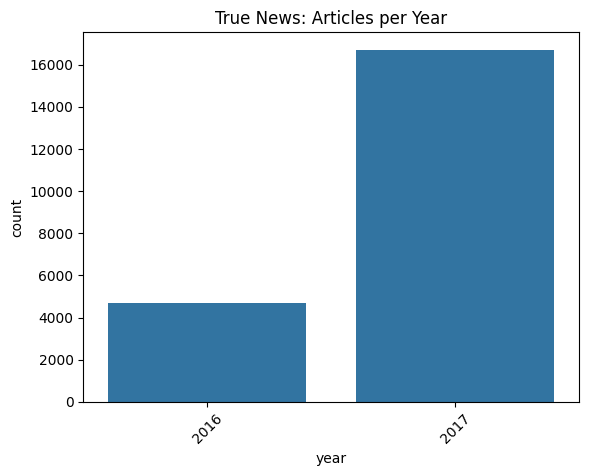

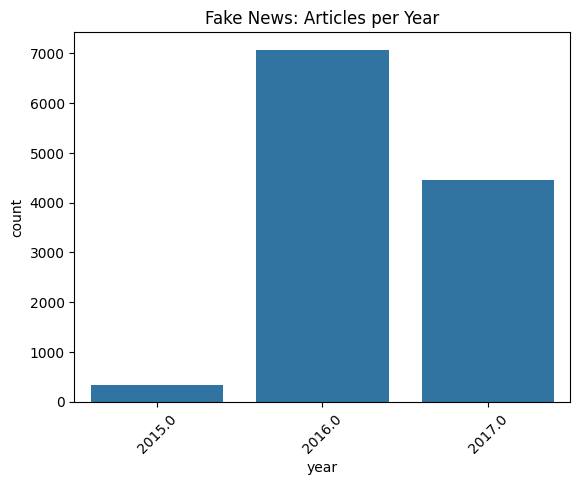

In [12]:
# True News
true_df['year'] = true_df['date'].dt.year
sns.countplot(data=true_df, x='year')
plt.title("True News: Articles per Year")
plt.xticks(rotation=45)
plt.show()

# Fake News
fake_df['year'] = fake_df['date'].dt.year
sns.countplot(data=fake_df, x='year')
plt.title("Fake News: Articles per Year")
plt.xticks(rotation=45)
plt.show()


# Text Length Distribution

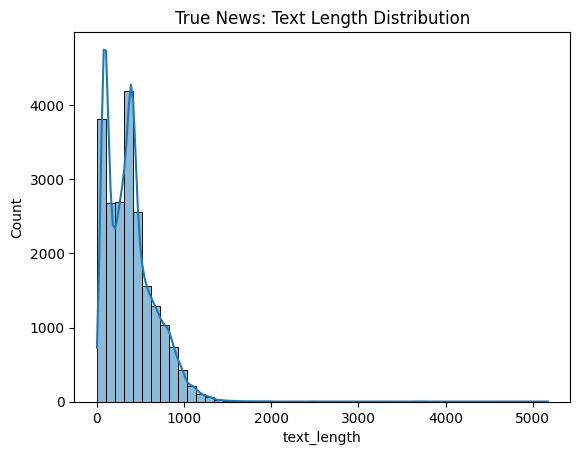

🔹 True News Text Length Stats:
 count    21417.000000
mean       385.640099
std        274.006204
min          0.000000
25%        148.000000
50%        359.000000
75%        525.000000
max       5172.000000
Name: text_length, dtype: float64
Skewness: 1.4818179163308107


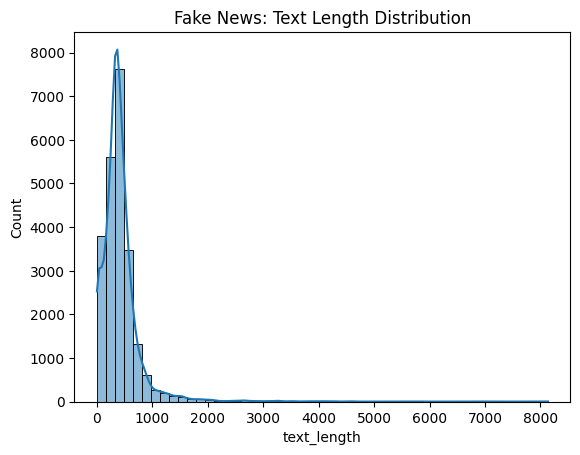

🔹 Fake News Text Length Stats:
 count    23481.000000
mean       423.197905
std        408.388890
min          0.000000
25%        240.000000
50%        363.000000
75%        506.000000
max       8135.000000
Name: text_length, dtype: float64
Skewness: 6.248914457815621


In [13]:
# True News
true_df['text_length'] = true_df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(true_df['text_length'], bins=50, kde=True)
plt.title("True News: Text Length Distribution")
plt.show()
print("🔹 True News Text Length Stats:\n", true_df['text_length'].describe())
print("Skewness:", true_df['text_length'].skew())

# Fake News
fake_df['text_length'] = fake_df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(fake_df['text_length'], bins=50, kde=True)
plt.title("Fake News: Text Length Distribution")
plt.show()
print("🔹 Fake News Text Length Stats:\n", fake_df['text_length'].describe())
print("Skewness:", fake_df['text_length'].skew())
